In [4]:
import os
import pandas as pd  
from nltk.corpus import stopwords  
import numpy as np  
import seaborn as sns  
from nltk.stem.porter import *  
stemmer = PorterStemmer()  

In [5]:
#conda install -c anaconda nltk
#!pip install sklearn
import sklearn

In [6]:
os.listdir('../')

['.ipynb_checkpoints',
 '1600.csv',
 'data_analysis',
 'govhalfyearnews.ipynb',
 'gov_2020_jan-jun_news.csv']

In [7]:
govnews = pd.read_csv('../gov_2020_jan-jun_news.csv')

In [8]:
govnews = govnews.drop(govnews.columns[0],axis=1)

In [9]:
#ref: https://methodmatters.github.io/analyzing-wine-data-in-python-part-3/
'''# 1. Remove non-letters   
	letters_only = re.sub("[^a-zA-Z]", " ", raw_text)   
	# 2. Convert to lower case, split into individual words  
	words = letters_only.lower().split()  
	# 3. Remove Stopwords. In Python, searching a set is much faster than   
	# searching a list, so convert the stop words to a set  
	stops = set(stopwords.words("english"))   
	# 4. Remove stop words  
	meaningful_words = [w for w in words if not w in stops]   
	# 5. Stem words. Need to define porter stemmer above  
	singles = [stemmer.stem(word) for word in meaningful_words]  
	# 6. Join the words back into one string separated by space,   
	# and return the result.  '''
#1
govnews['meaningfulwords']=govnews.Content.apply(lambda x:re.sub('[^a-zA-Z]', ' ', x))
#2
govnews['meaningfulwords']=govnews.meaningfulwords.apply(lambda x: x.lower().split())
#3
stops = set(stopwords.words("english"))
#4
govnews['meaningfulwords']=govnews.meaningfulwords.apply(lambda x: [i for i in x if not i in stops])
#5
govnews['meaningfulwords']=govnews.meaningfulwords.apply(lambda x: [stemmer.stem(i) for i in x])

In [10]:
#6
govnews['meaningfulwords']=govnews.meaningfulwords.apply(lambda x:' '.join(x))

In [11]:
govnews['meaningfulwords']=govnews.meaningfulwords.apply(lambda x: x.replace(' nnnn', '').replace(' issu', '').replace(' hkt', '').replace(' end', '').replace(' today', ''))

In [25]:
processed_texts = [text for text in govnews['meaningfulwords']]  

In [26]:
from sklearn.feature_extraction.text import CountVectorizer  
vectorizer_count = CountVectorizer(ngram_range=(1, 2), min_df = 50, binary = True)  
  
# and apply it to the processed texts  
pred_feat_unigrams = vectorizer_count.fit_transform(processed_texts)  

In [27]:
# turn the dtm matrix to a numpy array to sum the columns  
pred_feat_array = pred_feat_unigrams.toarray()  
# Sum up the counts of each word  
dist = np.sum(pred_feat_array, axis=0)  
# extract the names of the features  
vocab = vectorizer_count.get_feature_names()   
# make it a dataframe  
topwords = pd.DataFrame(dist, vocab, columns = ["Word_in_Num_Documents"])  
# add 'word' as a column  
topwords = topwords.reset_index()  
# sort the words by document frequency  
topwords = topwords.sort_values(by = 'Word_in_Num_Documents', ascending=False)  

[Text(0, 0.5, 'Number of Documents')]

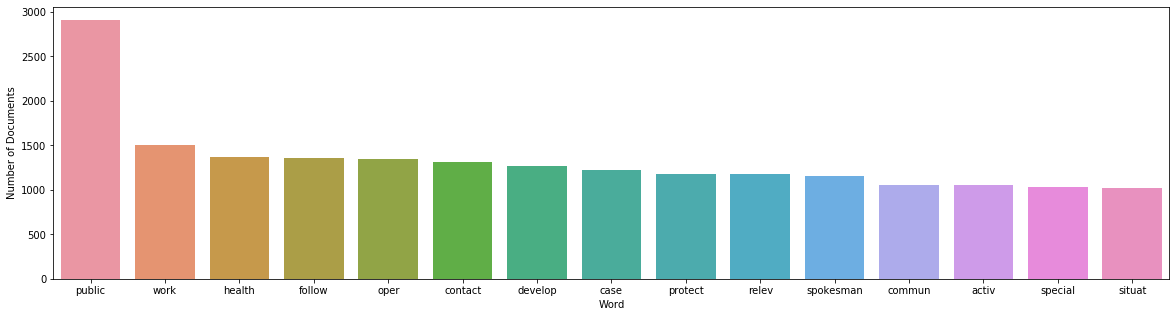

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))

# plot the top 15 words  
  
# set the palette for 15 colors  
current_palette = sns.cubehelix_palette(15, start = .3, reverse=True)  
sns.set_palette(current_palette, n_colors = 13)  
  
# plot the top words and set the axis labels  
topwords_plot = sns.barplot(x = 'index', y="Word_in_Num_Documents", data=topwords[0:15])  
topwords_plot.set(xlabel='Word')  
topwords_plot.set(ylabel='Number of Documents')  

In [31]:
def removeunwant():
    cont = True
    while cont:
        for i in topwords['index']:
            cont = input(f'del {i} ? y or N or E(sc)')
            if cont == 'y':
                govnews['meaningfulwords']=govnews.meaningfulwords.apply(lambda x: x.replace(' '+i, ''))
            elif cont == 'n':
                pass
            elif cont == 'e':
                cont = False
                break
            else:
                cont = input('y or n')
                if cont == 'y':
                    govnews['meaningfulwords']=govnews.meaningfulwords.apply(lambda x: x.replace(' '+i, ''))
                
    print('finish')


del public ? y or N or E(sc)n
del work ? y or N or E(sc)n
del health ? y or N or E(sc)n
del follow ? y or N or E(sc)y
del oper ? y or N or E(sc)y
del contact ? y or N or E(sc)e
finish


[Text(0, 0.5, 'Number of Documents')]

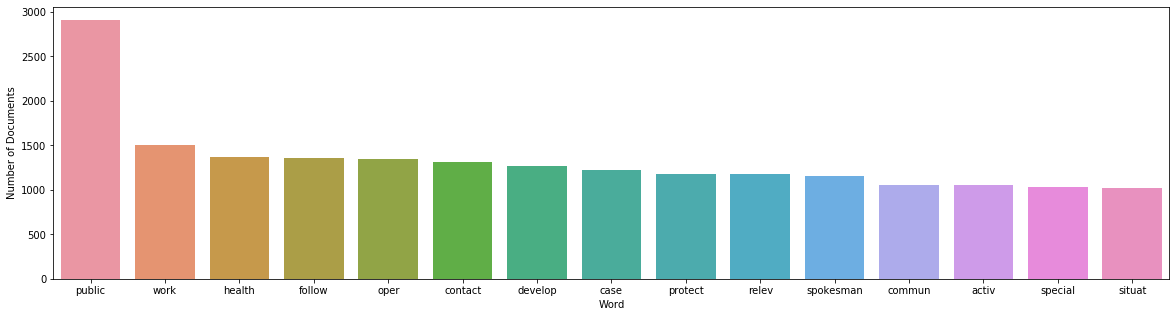

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))

# plot the top 15 words  
  
# set the palette for 15 colors  
current_palette = sns.cubehelix_palette(15, start = .3, reverse=True)  
sns.set_palette(current_palette, n_colors = 13)  
  
# plot the top words and set the axis labels  
topwords_plot = sns.barplot(x = 'index', y="Word_in_Num_Documents", data=topwords[0:15])  
topwords_plot.set(xlabel='Word')  
topwords_plot.set(ylabel='Number of Documents')  

In [32]:
#https://methodmatters.blogspot.com/2017/11/using-word2vec-to-analyze-word.html?m=1
# apply it to our text data 
# dataset is named wine_data and the text are in the column "wmn"
processed_wmn = govnews['meaningfulwords'].to_list()


In [35]:
# build a corpus for the word2vec model
def build_corpus(data):
    "Creates a list of lists containing words from each sentence"
    corpus = []
    for sentence in data:
        word_list = sentence.split(" ")
        corpus.append(word_list)    
           
    return corpus

corpus = build_corpus(processed_wmn)    

In [37]:
pip install gensim

  Created wheel for smart-open: filename=smart_open-2.1.1-py3-none-any.whl size=112418 sha256=aec226893292d65602d5913b7ef7bffb74d66a9c8deba75a34c6526ffbb40480
  Stored in directory: c:\users\yeung\appdata\local\pip\cache\wheels\d5\75\1d\d3da0d094f5e2ea61bddb9cb8cd4bd3ab9fb648e7269620855
Successfully built smart-open
  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.15
    Uninstalling Cython-0.29.15:
      Successfully uninstalled Cython-0.29.15
  Attempting uninstall: docutils
    Found existing installation: docutils 0.16
    Uninstalling docutils-0.16:
      Successfully uninstalled docutils-0.16
Note: you may need to restart the kernel to use updated packages.


In [38]:
# load the word2vec algorithm from the gensim library
from gensim.models import word2vec
# run the model
model = word2vec.Word2Vec(corpus, size=100, window=5, min_count=1000, workers=4)

C:\Users\yeung\anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]


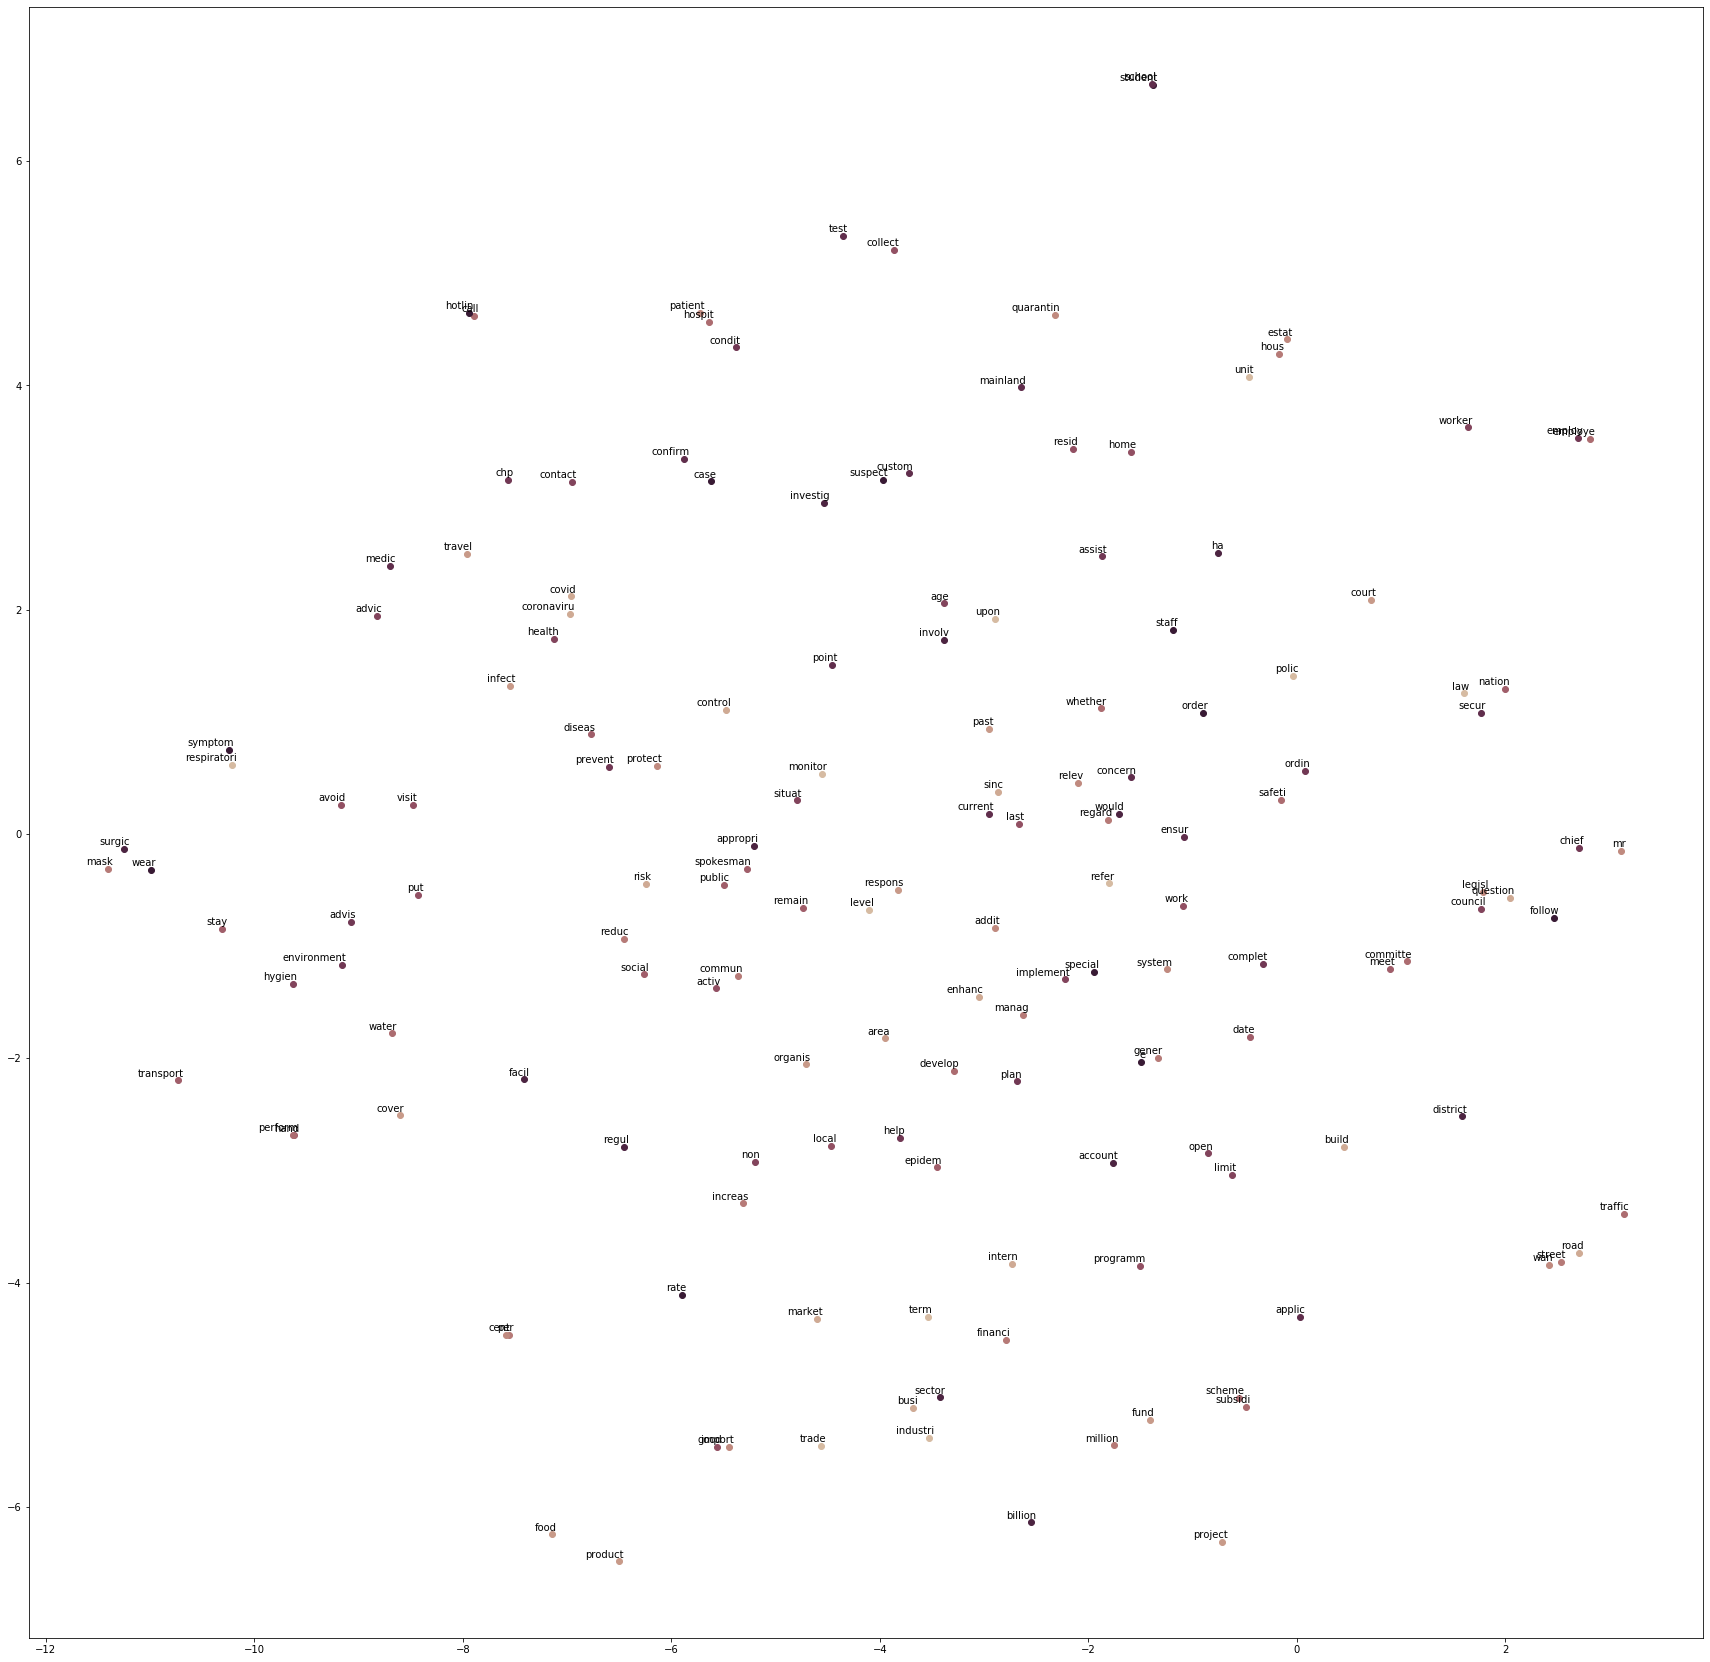

In [41]:
# import the t-SNE library and matplotlib for plotting
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# define the function to compute the dimensionality reduction
# and then produce the biplot
def tsne_plot(model):
    "Creates a TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(30, 30)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()
    
# call the function on our dataset
tsne_plot(model)